In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path="/content/insurance (1).csv"
df=pd.read_csv(path)#Loading the dataset into a pandas DataFrame
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ***1. EXPLORATORY DATA ANALYSIS***


### ***1.1  Data Inspection***


In [2]:
df.shape#  To Get the dimensions of the DataFrame (number of rows and columns)

(1338, 7)

Knowing Shape of data is the very first step of Data Inspection. The shape (1338,7) says there are 1338 data points and each data point has 7 different features.

In [3]:
df.info() #Printing a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Seeing information it is known that there are no null values**

In [4]:
df.describe().T #For Generating descriptive statistics for numerical columns in the DataFrame,

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.nunique()# Seeing Different types in each feature

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


### **1.2 STATISTICAL INFERENCE**


#### ***Numeric Data Distribution***

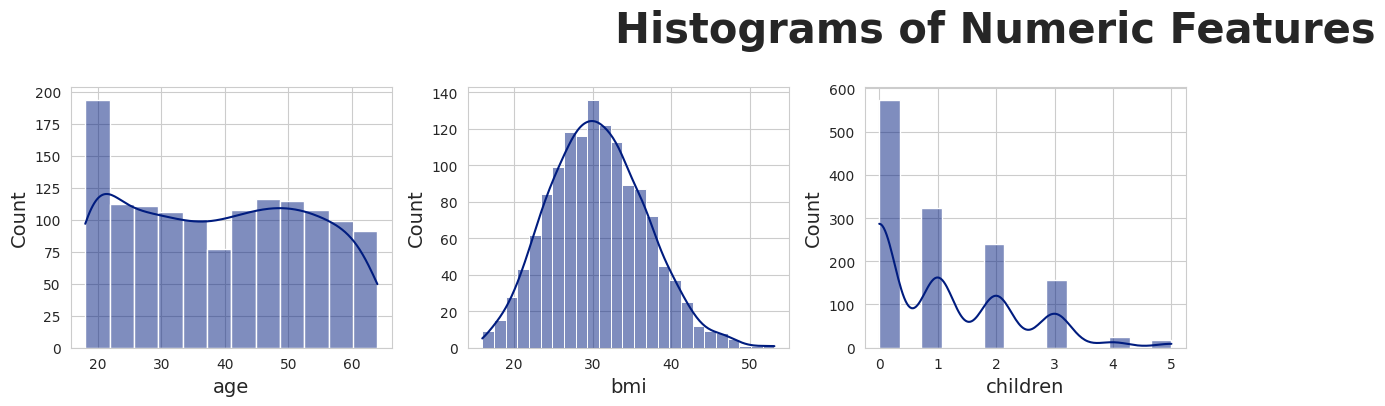

In [6]:

numeric_features = [feature for feature in df.columns if df[feature].dtype not in ['O', 'bool'] and feature != 'charges']
ncols = 5
nrows = (len(numeric_features) + ncols - 1) // ncols
sns.set_style('whitegrid')
sns.set_palette('dark')
plt.figure(figsize=(20, 4 * nrows))
plt.suptitle('Histograms of Numeric Features', fontsize=30, fontweight='bold', family='sans-serif', y=1.005)

for i, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, i + 1)  # Creating a subplot for each feature
    sns.histplot(df[feature], kde=True)  # Plotting histogram with KDE
    plt.xlabel(feature, fontsize=14)  # Setting x-axis label
    plt.ylabel('Count', fontsize=14)  # Setting y-axis label

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()  # Adjusting layout for better fitting
plt.show()  # Displaying the plots


The Histogram plots shows there is no Skewness in the numeric features.

#### **Box Plots for Indentifying outliers**


Text(0.5, 1.0, 'age')

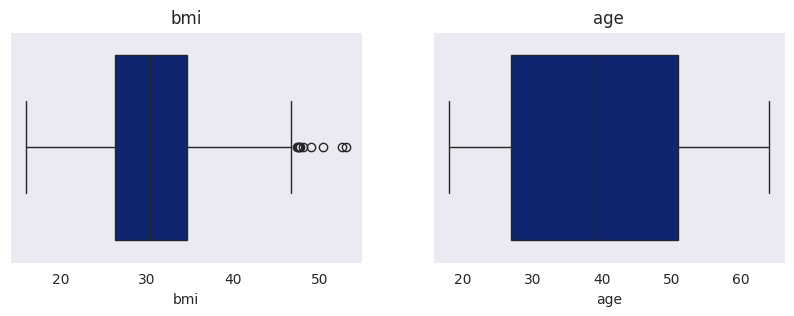

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
sns.set_style('dark')
sns.set_palette('dark')
sns.boxplot(ax=axes[0], x='bmi', data=df)
axes[0].set_title("bmi")
sns.boxplot(ax=axes[1], x='age', data=df)
axes[1].set_title("age")

The boxPlot shows there are some outliers in the feature 'bmi' in the dataset

**Removing the outliears**

In [25]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
IQR=q3-q1
min_range=q1-IQR*1.5
max_range=q3+1.5*IQR

new_df =df[df['bmi']<=max_range]
new_df = new_df.reset_index(drop=True)
new_df.shape

(1329, 7)

**outliers are removed**

Text(0.5, 1.0, 'age')

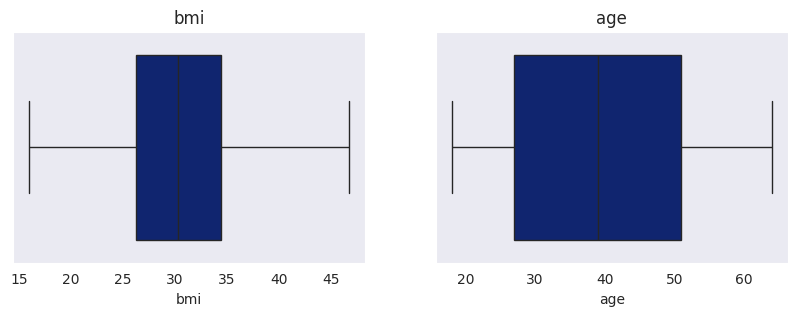

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
sns.set_style('dark')
sns.set_palette('dark')
sns.boxplot(ax=axes[0], x='bmi', data=new_df)
axes[0].set_title("bmi")
sns.boxplot(ax=axes[1], x='age', data=new_df)
axes[1].set_title("age")

### Filling of Categorical Features

In [27]:
pd.options.mode.copy_on_write = True
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['smoker']=le.fit_transform(new_df['smoker'])
new_df['sex']=le.fit_transform(new_df['sex'])
new_df['region']=le.fit_transform(new_df['region'])
new_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Creating a new feature(Feature Engineering)

In [28]:
new_df['mage']=new_df['bmi']*new_df['age']
new_df.head(5)

,age,sex,bmi,children,smoker,region,charges,mage
0,19,0,27.900,0,1,3,16884.92400,530.100
1,18,1,33.770,1,0,2,1725.55230,607.860
2,28,1,33.000,3,0,2,4449.46200,924.000
3,33,1,22.705,0,0,1,21984.47061,749.265
4,32,1,28.880,0,0,1,3866.85520,924.160


### Visualization

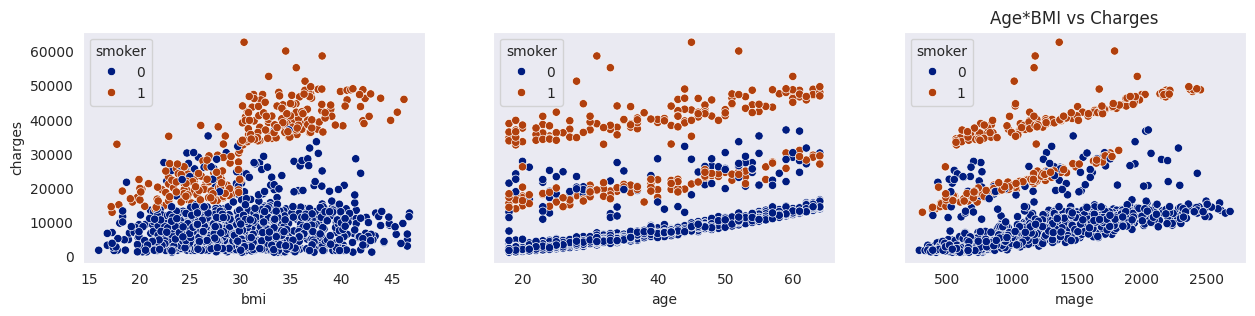

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
sns.scatterplot(ax=axes[0],x='bmi',y='charges',hue='smoker',data=new_df)
plt.title("BMI vs Charges")
sns.scatterplot(ax=axes[1],x='age',y='charges',hue='smoker',data=new_df)
plt.title("Age vs Charges")
sns.scatterplot(ax=axes[2],x='mage',y='charges',hue='smoker',data=new_df)
plt.title("Age*BMI vs Charges")
plt.show()

**From the plot of 'Age*Bmi' we can see if we train a linear regression model for smoker and non smoker respectively then model can fit the dataset properly.**

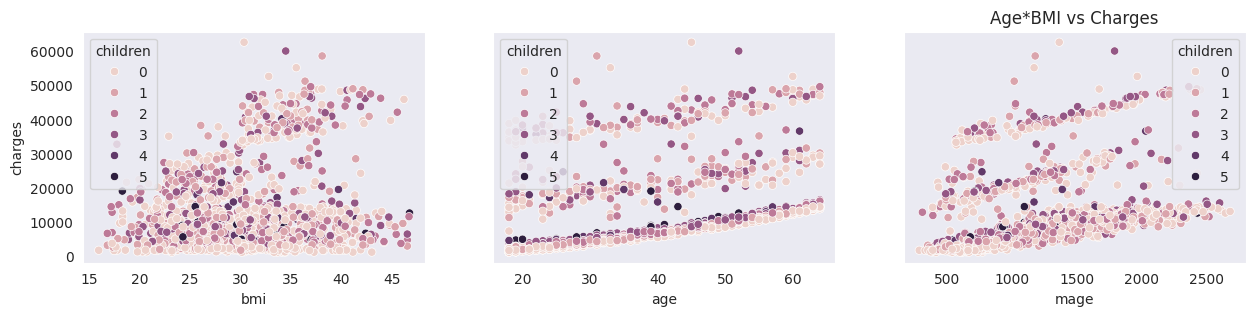

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
sns.scatterplot(ax=axes[0],x='bmi',y='charges',hue='children',data=new_df)
plt.title("BMI vs Charges")
sns.scatterplot(ax=axes[1],x='age',y='charges',hue='children',data=new_df)
plt.title("Age vs Charges")
sns.scatterplot(ax=axes[2],x='mage',y='charges',hue='children',data=new_df)
plt.title("Age*BMI vs Charges")
plt.show()

In [31]:
print(((((new_df['children']==0) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==0).sum())*100)
print(((((new_df['children']==1) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==1).sum())*100)
print(((((new_df['children']==2) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==2).sum())*100)
print(((((new_df['children']==3) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==3).sum())*100)
print(((((new_df['children']==4) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==4).sum())*100)
print(((((new_df['children']==5) & (new_df['charges']<13270.422265)).sum())/(new_df['children']==5).sum())*100)


68.82661996497373
72.8125
65.96638655462185
61.78343949044586
64.0
88.88888888888889


This percentage shows that number of children is also playing a good role in predicting the insurance as most are below charge 13270.422265 charge

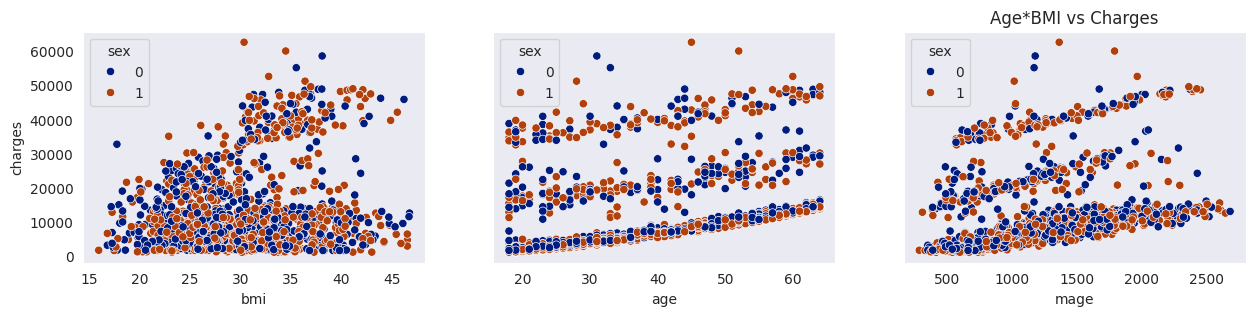

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
sns.scatterplot(ax=axes[0],x='bmi',y='charges',hue='sex',data=new_df)
plt.title("BMI vs Charges")
sns.scatterplot(ax=axes[1],x='age',y='charges',hue='sex',data=new_df)
plt.title("Age vs Charges")
sns.scatterplot(ax=axes[2],x='mage',y='charges',hue='sex',data=new_df)
plt.title("Age*BMI vs Charges")
plt.show()

In [33]:
print(((((new_df['sex']==0) & (new_df['charges']<13270.422265)).sum())/(new_df['sex']==0).sum())*100)
print((((new_df['sex']==1) & (new_df['charges']<13270.422265)).sum())/((new_df['sex']==0).sum())*100)

70.10622154779969
68.28528072837634


This Percentage shows that 'sex' plays role in predicting charge.

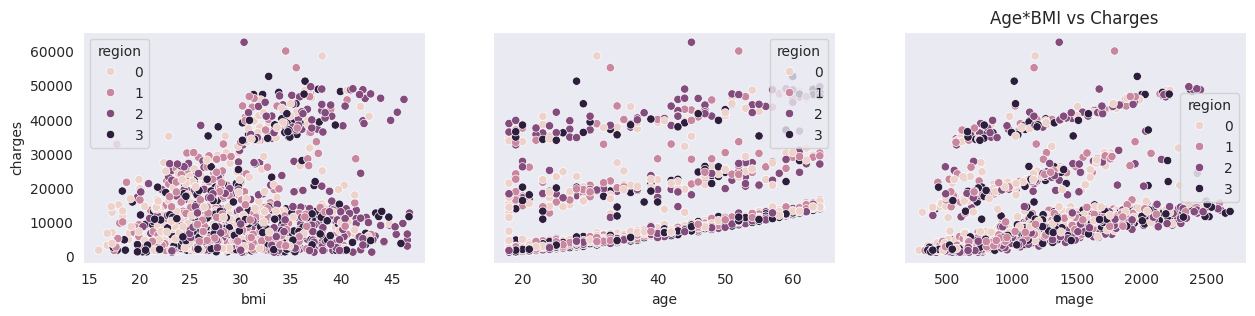

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)
sns.scatterplot(ax=axes[0],x='bmi',y='charges',hue='region',data=new_df)
plt.title("BMI vs Charges")
sns.scatterplot(ax=axes[1],x='age',y='charges',hue='region',data=new_df)
plt.title("Age vs Charges")
sns.scatterplot(ax=axes[2],x='mage',y='charges',hue='region',data=new_df)
plt.title("Age*BMI vs Charges")
plt.show()

In [35]:
print(((((new_df['region']==3) & (new_df['charges']<13270.422265)).sum())/(new_df['region']==3).sum())*100)
print((((new_df['region']==2) & (new_df['charges']<13270.422265)).sum())/((new_df['region']==3).sum())*100)
print((((new_df['region']==1) & (new_df['charges']<13270.422265)).sum())/((new_df['region']==3).sum())*100)
print((((new_df['region']==0) & (new_df['charges']<13270.422265)).sum())/((new_df['region']==3).sum())*100)

74.07407407407408
70.67901234567901
70.67901234567901
66.0493827160494


This plots shows that 'region' also plays a important role in predicting charges

### Correlation Matrix

This helps us to understand how different features are dependent on each other

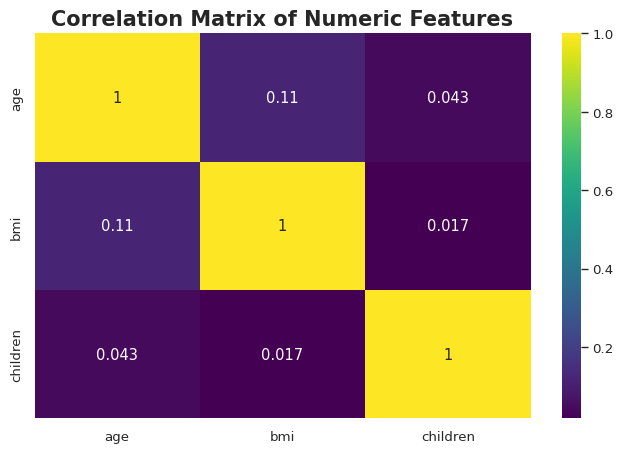

In [36]:
plt.figure(figsize=(8, 5))
sns.set_context('paper', font_scale=1.1)

numeric_df = new_df[numeric_features]
# Calculating the correlation matrix of numeric features
asteroid_matrix = numeric_df.corr()

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(asteroid_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numeric Features', fontsize=15, fontweight='bold')
plt.show()


## Training of Model

In [37]:
Y=new_df['charges'].to_numpy()
new1_df=new_df.drop(columns=['charges','age','bmi'],axis=1)
new1_df.head(5)

,sex,children,smoker,region,mage
0,0,0,1,3,530.100
1,1,1,0,2,607.860
2,1,3,0,2,924.000
3,1,0,0,1,749.265
4,1,0,0,1,924.160


**Splitting of dataset into 90% Train set and 10% Test set**

In [38]:
from sklearn.model_selection import train_test_split
x_train_df, x_test_df, y_train, y_test = train_test_split(new1_df, Y, test_size=0.1, random_state=42)


**Extracting the smoker column so that it can be used to train to linear regressions, one with smoker=0 and one with smoker=1**

In [39]:
smoker_train=x_train_df['smoker'].to_numpy()
smoker_test=x_test_df['smoker'].to_numpy()
x_train_df=x_train_df.drop(columns=['smoker'])
x_test_df=x_test_df.drop(columns=['smoker'])
x_train_df.head(5)

,sex,children,region,mage
1178,1,3,1,712.50
1099,0,2,1,1311.00
756,0,2,0,760.76
1219,1,2,2,1561.56
1269,0,0,1,951.52


In [40]:
import numpy as np
X=x_train_df.to_numpy()#converting panda dataframe into numpy
Xtest=x_test_df.to_numpy()
X

array([[1.0000e+00, 3.0000e+00, 1.0000e+00, 7.1250e+02],
       [0.0000e+00, 2.0000e+00, 1.0000e+00, 1.3110e+03],
       [0.0000e+00, 2.0000e+00, 0.0000e+00, 7.6076e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 3.0000e+00, 5.2000e+02],
       [1.0000e+00, 0.0000e+00, 2.0000e+00, 6.7122e+02],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, 9.4696e+02]])

#### Normalisation(Feature Scaling)

In [41]:
def norm(X):
  mean=np.mean(X)
  std=np.std(X)
  norm_X=(X-mean)/std
  return norm_X

In [42]:
X_norm=norm(X)
Xtest_norm=norm(Xtest)
print(X_norm)

[[-0.51746639 -0.514041   -0.51746639  0.70111342]
 [-0.51917908 -0.5157537  -0.51746639  1.72615912]
 [-0.51917908 -0.5157537  -0.51917908  0.7837679 ]
 ...
 [-0.51917908 -0.51746639 -0.514041    0.37142036]
 [-0.51746639 -0.51917908 -0.5157537   0.63041353]
 [-0.51746639 -0.51917908 -0.51746639  1.10267101]]


#### Cost Function(Mean Square Error)

In [43]:
def cost(w,b,w1,b1,x,y,s):# function for calculating cost function
  m=x.shape[0]
  j=0
  j1=0;a=0;
  for i in range(m):
    if(s[i]==0):
     f=np.dot(x[i],w)+b
     j=j+(f-y[i])**2
    else:
     f1=np.dot(x[i],w1)+b1
     j1=j1+(f1-y[i])**2
     a=a+1
  j=j/(2*(m-a))
  j1=j1/(2*(a))
  return j,j1


#### Gradient Descent

In [44]:
def gradient(w,b,w1,b1,x,y,s):# function for calculating gradient descent
  m=x.shape[0]
  e=0;d=0;
  e1=0;D=0;
  a=0
  for i in range(m):
    if(s[i]==0):
      d1=np.dot(x[i],w)+b-y[i]
      e=e+d1
      d=d+d1*x[i]
    else:
      d2=np.dot(x[i],w1)+b1-y[i]
      e1=e1+d2
      D=D+d2*x[i]
      a=a+1
  e=e/((m-a))
  e1=e1/((a))
  d=d/((m-a))
  D=D/((a))
  return e,d,e1,D

#### Training

In [45]:
def histcost(w,b,w1,b1,x,y,s):# function for running the gradient descent and keeping the history of cost function
  m=x.shape[0]
  alpha=0.1
  j_hist1=[]
  j_hist2=[]
  for i in range(2001):
    j_cost,j_cost1=cost(w,b,w1,b1,x,y,s)
    if i%1000==0:
      j_hist1.append(j_cost)
      j_hist2.append(j_cost1)
    e,d,e1,D=gradient(w,b,w1,b1,x,y,s)
    w=w-alpha*d
    b=b-alpha*e
    w1=w1-alpha*D
    b1=b1-alpha*e1
  xaxis=[0,1000,2000]
  fig, axes = plt.subplots(1, 2, figsize=(15, 3))
  axes[0].plot(xaxis,j_hist1)
  axes[0].set_title("j_hist1")
  axes[1].plot(xaxis,j_hist2)
  axes[1].set_title("j_hist2")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost")
  return w,b,w1,b1


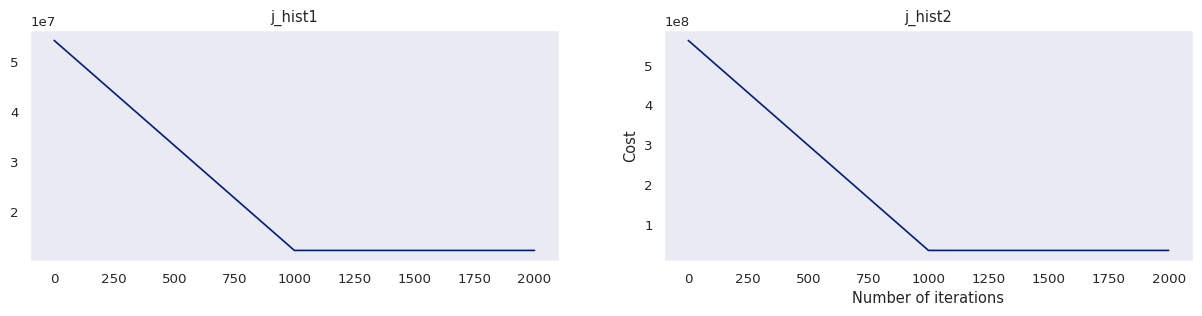

In [47]:
W=[0,0,0,0];B=0;W1=[0,0,0,0];B1=0;
w,b,w1,b1=histcost(W,B,W1,B1,X_norm,y_train,smoker_train)


The Cost function is decrasing with number of iteration showing the algortihm is working well

In [48]:
print(w)
print(b)
print(w1)
print(b1)

[ -799.1461149   -412.5753348  -1012.06062909  3785.23970816]
1412.5678720992853
[-5272.96594693 -5477.54647741 -5017.96139125  8858.15264074]
10374.421649718879


#### Prediction

In [49]:
y_predict=[]
for i in range(Xtest_norm.shape[0]):
  if(smoker_test[i]==0):
    y_predict.append(np.dot(Xtest_norm[i],w)+b)
  else:
    y_predict.append(np.dot(Xtest_norm[i],w1)+b1)


In [50]:
from sklearn import metrics
p=metrics.r2_score(y_test,y_predict)
print(p)

0.8130602758154386


accuracy of the model is 81.30%

## Using In built Libraries

In [51]:
df_final=new_df.drop(columns=['charges'])
df_final.head(5)

,age,sex,bmi,children,smoker,region,mage
0,19,0,27.900,0,1,3,530.100
1,18,1,33.770,1,0,2,607.860
2,28,1,33.000,3,0,2,924.000
3,33,1,22.705,0,0,1,749.265
4,32,1,28.880,0,0,1,924.160


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train1, y_test1 = train_test_split(df_final, Y, test_size=0.1, random_state=42)


### Using SKlearn's Linearegression Task

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train1)
y=regressor.predict(x_test)
p1=metrics.r2_score(y_test1,y)
print(p1)


0.7853583402118678


### Using Boosting Algorithm

In [54]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
xgb_regressor.fit(x_train, y_train)
y=xgb_regressor.predict(x_test)
p2=metrics.r2_score(y_test,y)
print(p2)


0.8868150059659673


**Using XGBoost gives accuracy 88.68%**

As XGboost better accuracy, we will use it to do final prediction

## Final Predicted Values

In [57]:
predicted_charges=xgb_regressor.predict(df_final)
new_df['predicted_charges']=predicted_charges
new_df.head(5)

,age,sex,bmi,children,smoker,region,charges,mage,predicted_charges
0,19,0,27.900,0,1,3,16884.92400,530.100,17682.847656
1,18,1,33.770,1,0,2,1725.55230,607.860,3329.536377
2,28,1,33.000,3,0,2,4449.46200,924.000,6245.099609
3,33,1,22.705,0,0,1,21984.47061,749.265,5690.421387
4,32,1,28.880,0,0,1,3866.85520,924.160,4679.380371
